In [25]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

df = pd.read_excel('C:/Users/82109/Desktop/miniProject/Problem/train.xlsx')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 999) # pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 999) # pd.options.display.max_columns = 999
pd.set_option('display.width', 1000)

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['우범여부'])
    feature_survived.columns = feature_survived.columns.map({0:"정상", 1:"우범"})
    return feature_survived


def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(df, col_name)
    pie_chart(colname_survived)
    return colname_survived


def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' 우범".format(index_name))

    plt.show()
    

for var in ['신고중량(KG)', '과세가격원화금액']:
    df[var] = df[var].apply(lambda x: np.log1p(x))
    
##one hot encoding
discrete_columns = ['신고일자',  '통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

for var in discrete_columns:
    df[var] = df[var].astype(str)
    
for var in numeric_columns:
    df[var] = df[var].astype('int64')

df.sample(3)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,검사결과코드,우범여부,핵심적발
53740,50300730,2020-07-06,40,7Q31W,E7C7OKU,nan,nan,C,B,11,21,11,8,8,10,4077011,3926909000,CN,CN,C,6,A,0,0
37467,26638759,2020-05-06,20,T1C4S,1RAE74U,MRHW18Y,nan,F,B,87,21,14,8,10,40,2011017,8703231020,US,DE,C,8,N2_J6_N5_N1_D2,1,2
66000,95121703,2020-08-18,20,X75YJ,UB4HUYE,nan,nan,F,B,11,21,11,10,10,10,6277057,6307909000,TW,TW,A,10,A,0,0


(array([  174.,   301.,   938.,  3131.,  8338., 11555., 27467., 18122.,
         6153.,   658.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

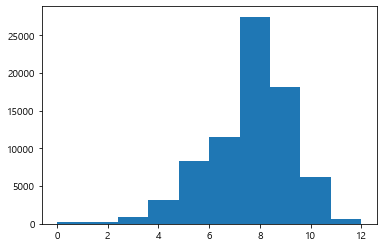

In [27]:
plt.hist(df['신고중량(KG)'])

(array([6.9100e+02, 7.9100e+02, 6.3750e+03, 1.2360e+04, 2.9551e+04,
        2.2780e+04, 3.5330e+03, 6.8300e+02, 6.4000e+01, 9.0000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

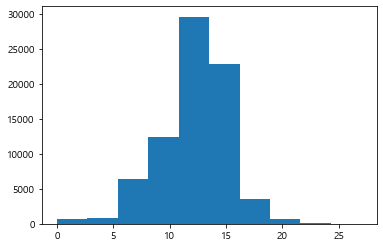

In [30]:
plt.hist(df['과세가격원화금액'])

In [33]:
df=df.astype({'신고중량(KG)': 'str'})
df=df.astype({'과세가격원화금액': 'str'})

<ipython-input-25-086f869ddc55>:40: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


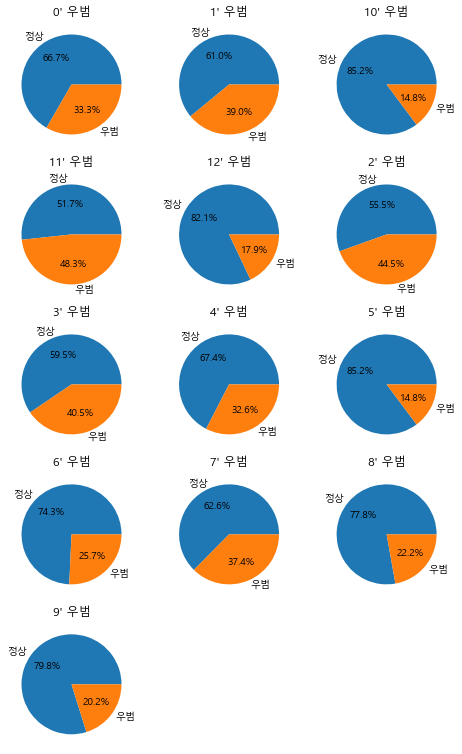

우범여부,정상,우범
신고중량(KG),,
0,22,11
1,86,55
10,5242,911
11,320,299
12,32,7
2,167,134
3,558,380
4,2111,1020
5,7105,1233


In [39]:
show_pie_chart(df, '신고중량(KG)')

<ipython-input-25-086f869ddc55>:40: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


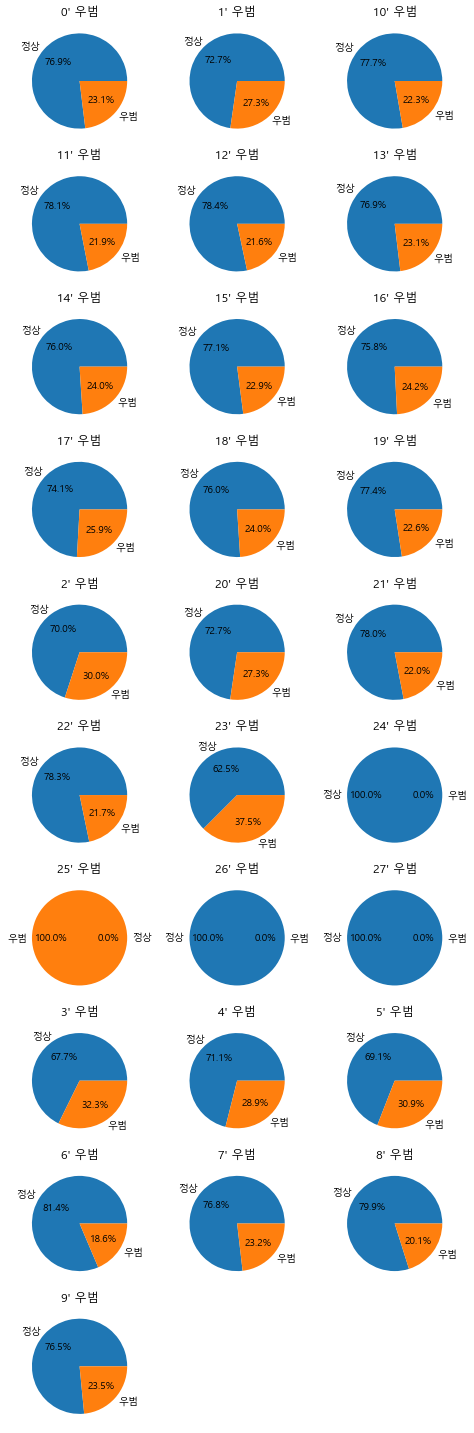

우범여부,정상,우범
과세가격원화금액,,
0,500,150
1,8,3
10,5455,1563
11,6992,1962
12,8224,2271
13,7769,2333
14,7666,2418
15,6137,1827
16,3587,1145


In [36]:
show_pie_chart(df, '과세가격원화금액')

In [ ]:
##one hot encoding
discrete_columns = ['신고일자',  '통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

for var in discrete_columns:
    df[var] = df[var].astype(str)
    
for var in numeric_columns:
    df[var] = df[var].astype('int64')

##one hot encoding
from sklearn.preprocessing import  OneHotEncoder
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
df_onehot = xgbohe.fit_transform(df_onehot[discrete_columns])
df_onehot = pd.DataFrame(df_onehot.toarray(), columns = xgbohe.get_feature_names(discrete_columns))
df_onehot = pd.concat([df_onehot, df_numeric], axis=1)

In [ ]:
##사이킷런으로 k-means clustering
from sklearn.cluster import KMeans

df['testcolumn']=0
datax=df['신고중량(KG)'].to_numpy()
datay=df['testcolumn'].to_numpy()
points=pd.DataFrame(datax, datay)
points.column=["datax", "datay"]

kmeans=KMeans(n_clusters=2)
kmeans.fit(points)
df['testcolumn']=kmeans.labels_
df=df.astype({'testcolumn':'str'})

test_column=df['HS10단위부호'].astype(str)

In [ ]:
##one hot encoding
discrete_columns = ['신고일자',  '통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

for var in discrete_columns:
    df[var] = df[var].astype(str)
    
for var in numeric_columns:
    df[var] = df[var].astype('int64')

df_numeric = df[numeric_columns]
df_onehot=df

##one hot encoding
from sklearn.preprocessing import  OneHotEncoder
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
df_onehot = xgbohe.fit_transform(df_onehot[discrete_columns])
df_onehot = pd.DataFrame(df_onehot.toarray(), columns = xgbohe.get_feature_names(discrete_columns))
df_onehot = pd.concat([df_onehot, df_numeric], axis=1)

